This notebook is for playing around with the Weighted Reservoir Sampling irrespective of complex images.

In [7]:
%run src/foveation_utils.py
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from typing import Dict, List, Tuple

from src.reservoir import Reservoir


In [8]:
witcher_lakeside_512_rgb  = cv2.imread("input/games/images/lakeside-villa-witcher3-512_1.png", cv2.IMREAD_COLOR)
witcher_lakeside_512_grayscale = cv2.cvtColor(witcher_lakeside_512_rgb, cv2.COLOR_BGR2GRAY)
witcher_lakeside_512_lab = cv2.cvtColor(witcher_lakeside_512_rgb, cv2.COLOR_BGR2LAB)
witcher_lakeside_512_rgb_channels = cv2.split(witcher_lakeside_512_rgb)
witcher_lakeside_512_lab_channels = cv2.split(witcher_lakeside_512_lab)

rgb_colours = ('b', 'g', 'r')

center = (witcher_lakeside_512_rgb.shape[0] // 2, witcher_lakeside_512_rgb.shape[1] // 2)
radii = (100, 200)

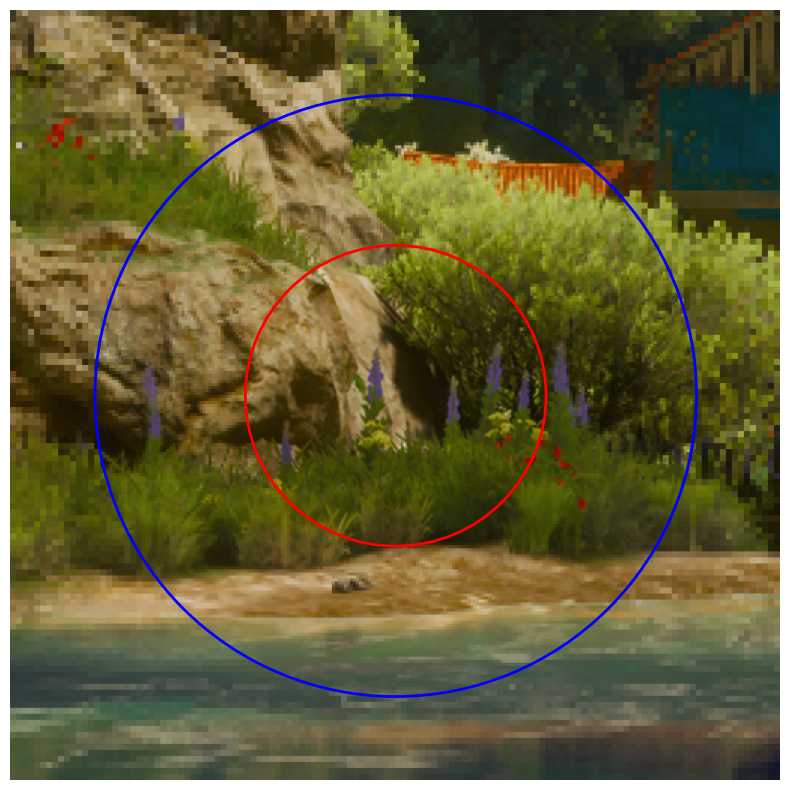

In [9]:
foveated_witcher_lakeside_512_rgb = guenter_foveated_rendering_px_mip(witcher_lakeside_512_rgb, center, radii)

visualize_guenter_foveated_regions_px(foveated_witcher_lakeside_512_rgb, center, radii)



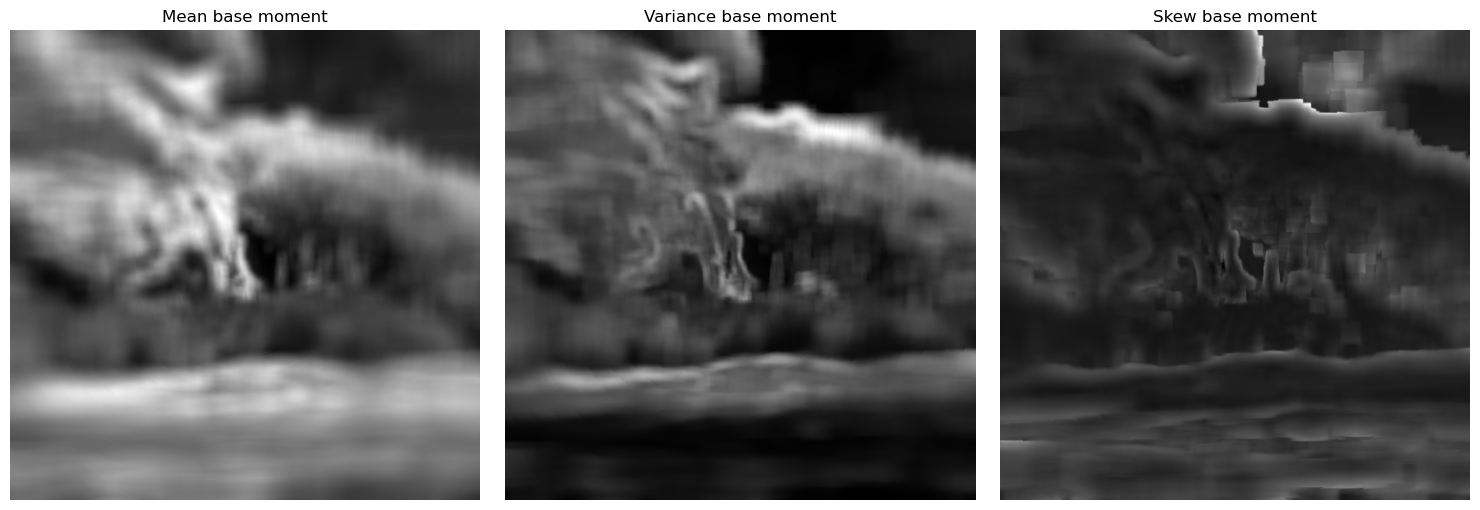

In [10]:
(mean_texture_witcher_lakeside, variance_texture_witcher_lakeside, skew_texture_witcher_lakeside) = compute_base_moments(witcher_lakeside_512_rgb, center, 0.1, base_pooling_size = 8)
visualize_base_moments(mean_texture_witcher_lakeside, variance_texture_witcher_lakeside, skew_texture_witcher_lakeside)

In [11]:
%run src/foveation_utils.py
num_levels = 5
gaussian_pyramids = compute_basemoments_gaussian_pyramids(mean_texture_witcher_lakeside, variance_texture_witcher_lakeside, skew_texture_witcher_lakeside, num_levels)
laplacian_pyramids = compute_basemoments_laplacian_pyramids(gaussian_pyramids)

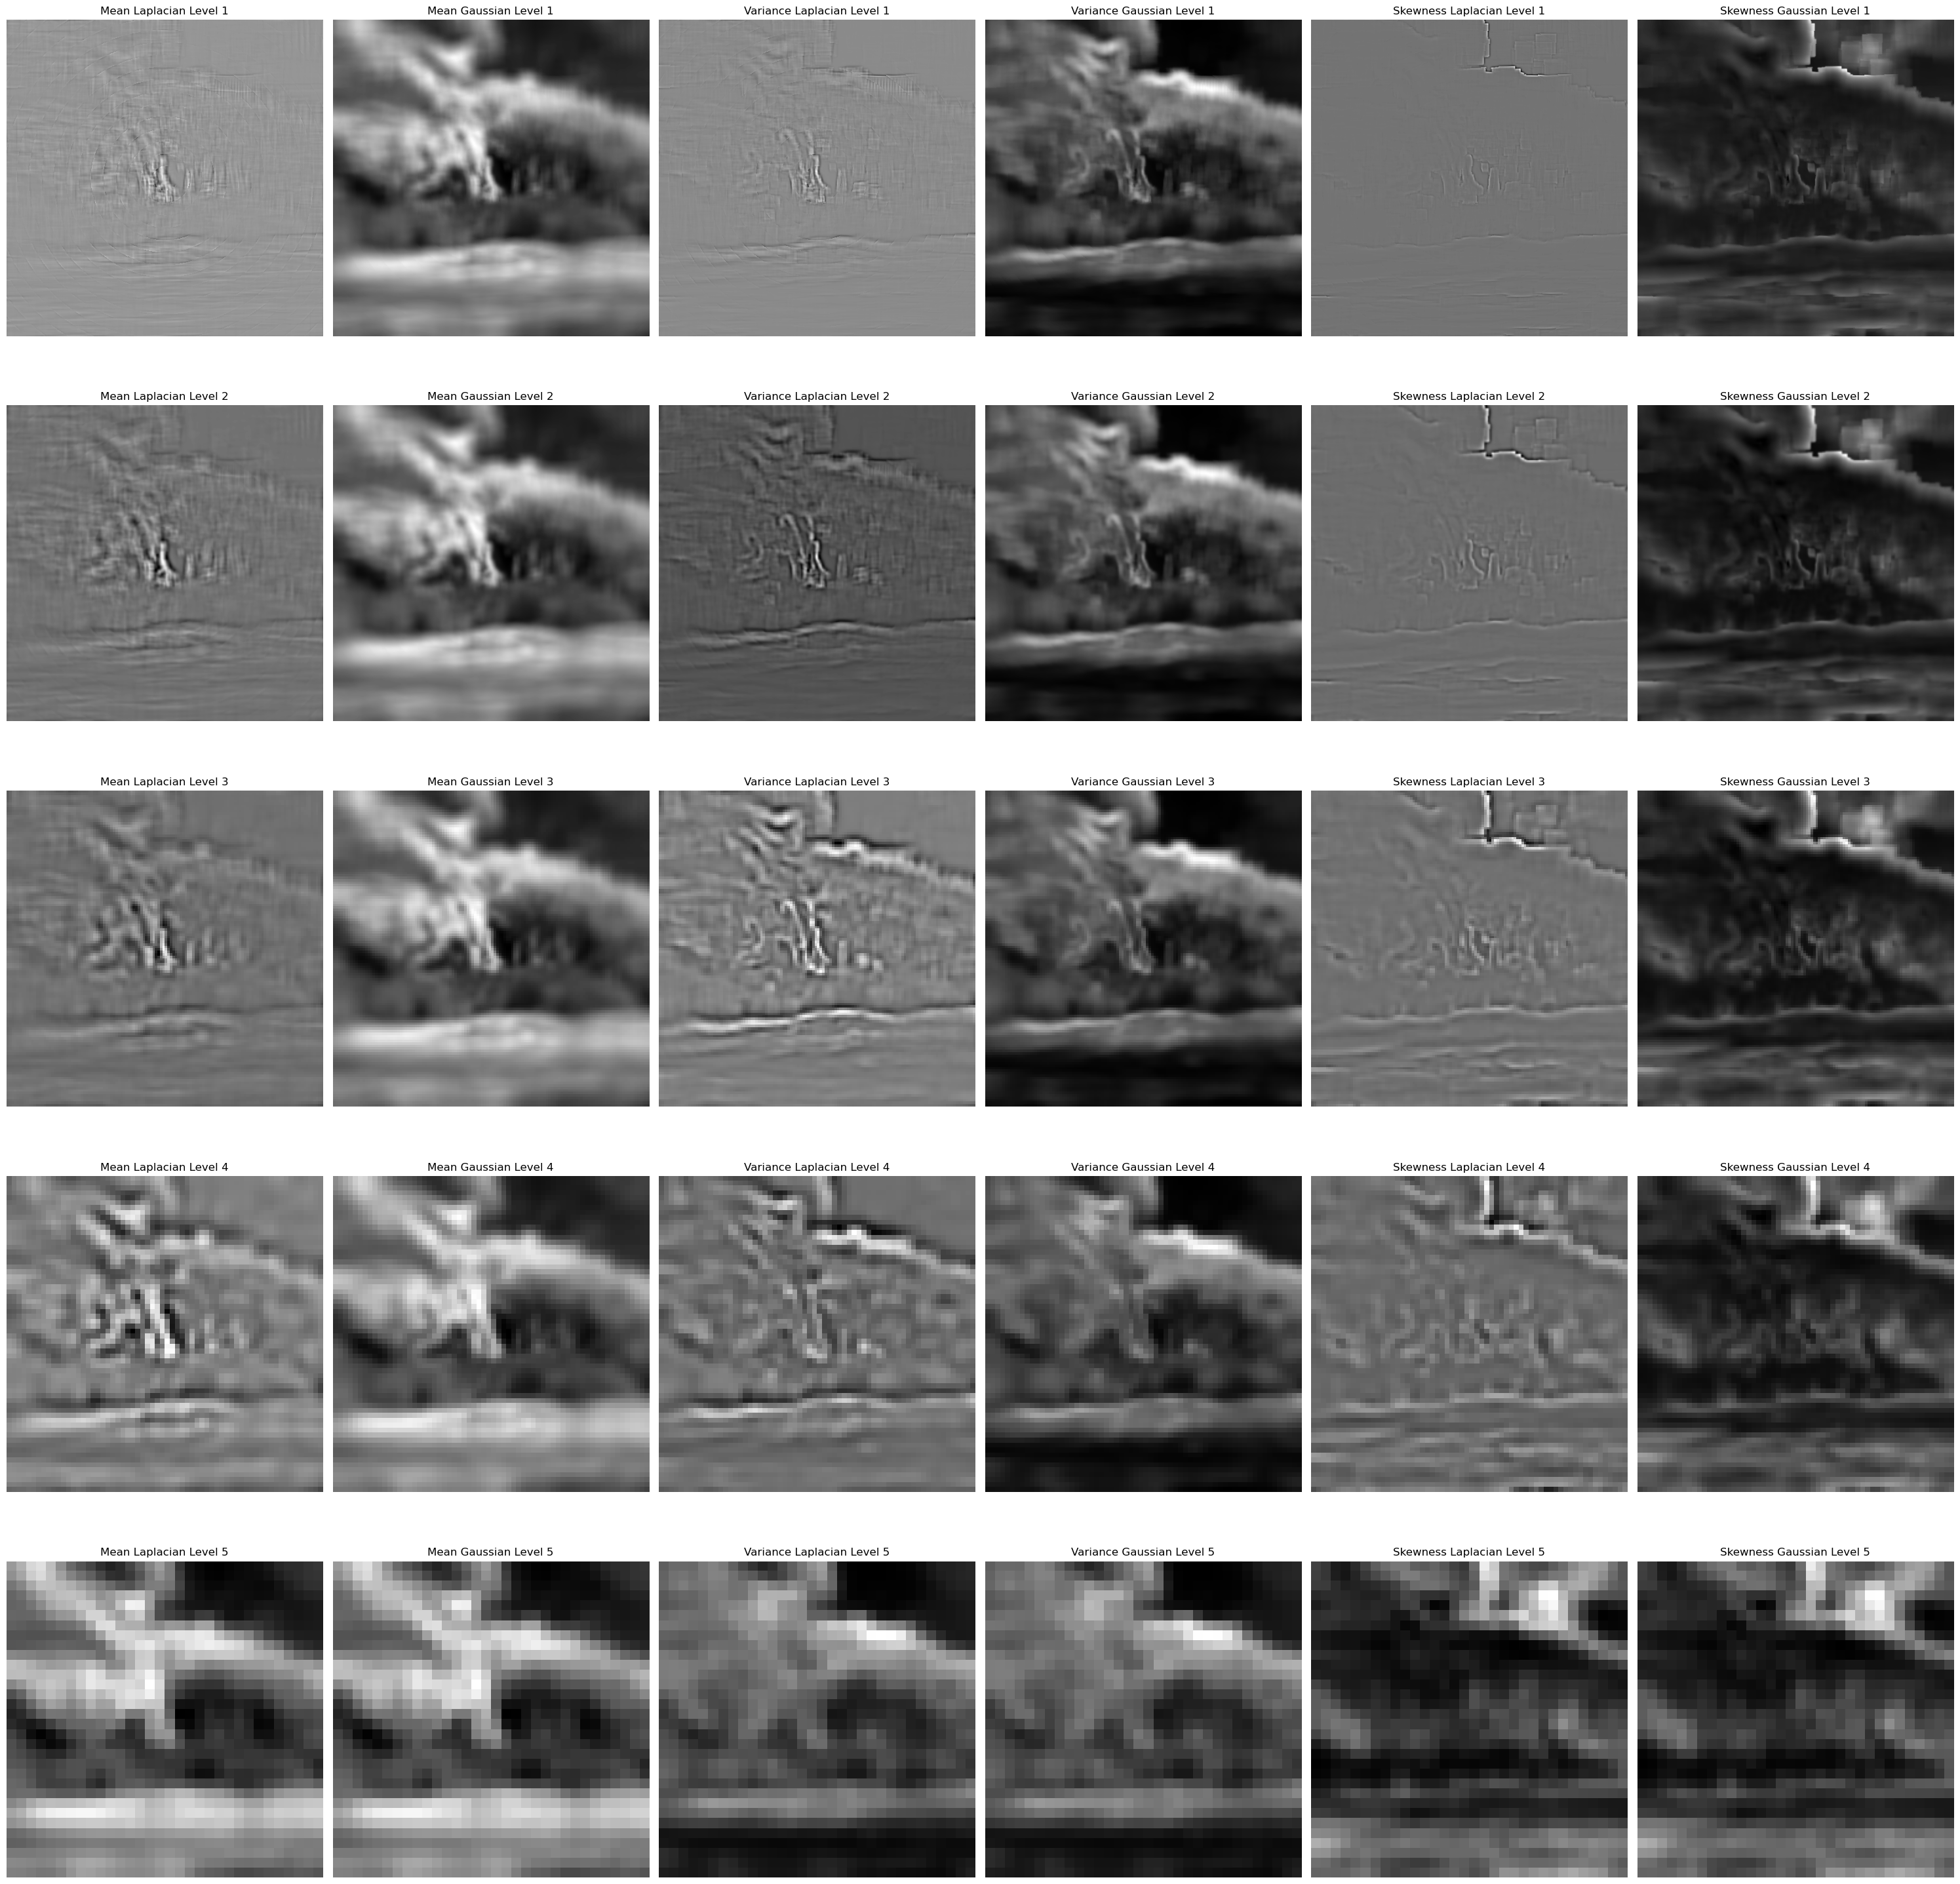

In [12]:
fig, axes = plt.subplots(num_levels, 6, figsize=(30, 30))
for i in range(num_levels):
    axes[i, 0].imshow(cv2.normalize(laplacian_pyramids['mean'][i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
    axes[i, 0].set_title(f'Mean Laplacian Level {i+1}')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(cv2.normalize(gaussian_pyramids['mean'][i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
    axes[i, 1].set_title(f'Mean Gaussian Level {i+1}')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(cv2.normalize(laplacian_pyramids['variance'][i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
    axes[i, 2].set_title(f'Variance Laplacian Level {i+1}')
    axes[i, 2].axis('off')

    axes[i, 3].imshow(cv2.normalize(gaussian_pyramids['variance'][i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
    axes[i, 3].set_title(f'Variance Gaussian Level {i+1}')
    axes[i, 3].axis('off')

    axes[i, 4].imshow(cv2.normalize(laplacian_pyramids['skew'][i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
    axes[i, 4].set_title(f'Skewness Laplacian Level {i+1}')
    axes[i, 4].axis('off')

    axes[i, 5].imshow(cv2.normalize(gaussian_pyramids['skew'][i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
    axes[i, 5].set_title(f'Skewness Gaussian Level {i+1}')
    axes[i, 5].axis('off')

plt.tight_layout()
plt.show()